### Go through all candor files

In [9]:
import os
import pandas as pd
import numpy as np
from tqdm import notebook
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rootdir = '../candor'
print(rootdir)

../candor


In [5]:
survey_list = []
for subdir, dirs, files in notebook.tqdm(os.walk(rootdir)):
    for file in files:
        if file=="survey.csv":
            current_csv = pd.read_csv(os.path.join(subdir, file))
            survey_list.append(current_csv)

0it [00:00, ?it/s]

In [19]:
survey_list[1]

,user_id,partner_id,convo_id,date,survey_duration_in_seconds,time_zone,pre_affect,pre_arousal,technical_quality,conv_length,...,my_conscientious,my_neurotic,my_open,your_extraversion,your_agreeable,your_conscientious,your_neurotic,your_open,who_i_talked_to_most_past24,most_common_format_past24
0,55a43cf3fdf99b02ff6cb0b4,5f220462c16ecb68c97ccad9,0c6b3a4a-7832-44ea-8830-ff727f2b803c,2020-11-16,2477,7.0,4.0,5.0,1.0,27.0,...,4.000000,2.666667,4.000000,4.0,4.0,4.0,2.333333,3.333333,NaN,NaN
1,5f220462c16ecb68c97ccad9,55a43cf3fdf99b02ff6cb0b4,0c6b3a4a-7832-44ea-8830-ff727f2b803c,2020-11-16,4058,6.0,7.0,6.0,1.0,25.0,...,2.666667,3.333333,3.333333,3.0,3.0,3.0,3.000000,3.000000,NaN,NaN


In [14]:
overall_arousal_list=[]
for i, survey in enumerate(notebook.tqdm(survey_list)):
    overall_arousal_list.append(survey["overall_arousal"])

  0%|          | 0/1656 [00:00<?, ?it/s]

In [15]:
overall_arousal_list

[0    7.0
 1    8.0
 Name: overall_arousal, dtype: float64,
 0    6.0
 1    7.0
 Name: overall_arousal, dtype: float64,
 0    5.0
 1    6.0
 Name: overall_arousal, dtype: float64,
 0    6.0
 1    5.0
 Name: overall_arousal, dtype: float64,
 0    8.0
 1    7.0
 Name: overall_arousal, dtype: float64,
 0    8.0
 1    6.0
 Name: overall_arousal, dtype: float64,
 0    7.0
 1    6.0
 Name: overall_arousal, dtype: float64,
 0    4.0
 1    3.0
 Name: overall_arousal, dtype: float64,
 0    8.0
 1    9.0
 Name: overall_arousal, dtype: float64,
 0    4.0
 1    5.0
 Name: overall_arousal, dtype: float64,
 0    7.0
 1    6.0
 Name: overall_arousal, dtype: float64,
 0    4.0
 1    6.0
 Name: overall_arousal, dtype: float64,
 0    8.0
 1    7.0
 Name: overall_arousal, dtype: float64,
 0    6.0
 1    9.0
 Name: overall_arousal, dtype: float64,
 0    9.0
 1    5.0
 Name: overall_arousal, dtype: float64,
 0    4.0
 1    5.0
 Name: overall_arousal, dtype: float64,
 0    5.0
 1    6.0
 Name: overall_arous

In [18]:
np.vstack(overall_arousal_list)

array([[7., 8.],
       [6., 7.],
       [5., 6.],
       ...,
       [6., 7.],
       [6., 8.],
       [7., 8.]])

## affect & arousal

In [6]:
preaffect_list = []
affect_list = []
prearousal_list = []
arousal_list = []
for i, survey in enumerate(notebook.tqdm(survey_list)):
    preaffect_list.append(survey["pre_affect"])
    affect_list.append(survey["affect"])
    prearousal_list.append(survey["pre_arousal"])
    arousal_list.append(survey["arousal"])


  0%|          | 0/1656 [00:00<?, ?it/s]

In [8]:
print(np.hstack(prearousal_list))

[7. 8. 5. ... 8. 6. 9.]


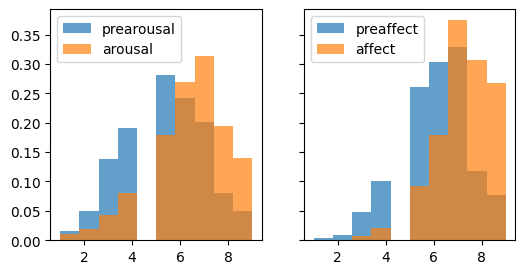

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3), sharey=True)
ax[0].hist(np.hstack(prearousal_list), alpha=0.7, density=True)
ax[0].hist(np.hstack(arousal_list), alpha=0.7, density=True)
ax[0].legend(["prearousal", "arousal"])
ax[1].hist(np.hstack(preaffect_list), alpha=0.7, density=True)
ax[1].hist(np.hstack(affect_list), alpha=0.7, density=True)
ax[1].legend(["preaffect", "affect"])
plt.show()